In [23]:
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [24]:
import os
img_gato = plt.imread("catto.png")
img_gato

array([[0.3372549 , 0.3529412 , 0.35686275, ..., 0.4392157 , 0.4509804 ,
        0.45490196],
       [0.3764706 , 0.3764706 , 0.38039216, ..., 0.44705883, 0.45882353,
        0.46666667],
       [0.39607844, 0.36862746, 0.3529412 , ..., 0.45490196, 0.4745098 ,
        0.5058824 ],
       ...,
       [0.3764706 , 0.39607844, 0.39215687, ..., 0.4117647 , 0.39215687,
        0.3764706 ],
       [0.44313726, 0.43137255, 0.38431373, ..., 0.4117647 , 0.40784314,
        0.39215687],
       [0.4862745 , 0.43529412, 0.35686275, ..., 0.42352942, 0.4392157 ,
        0.42745098]], dtype=float32)

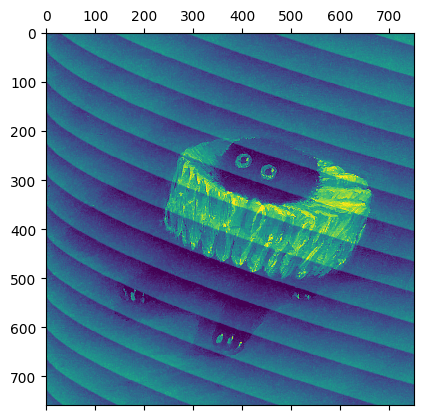

In [25]:
plt.matshow(img_gato)

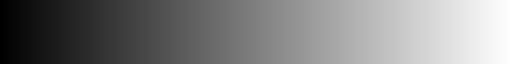

In [26]:
cmap = plt.get_cmap("grey")
cmap.set_bad((1,0,0))
cmap

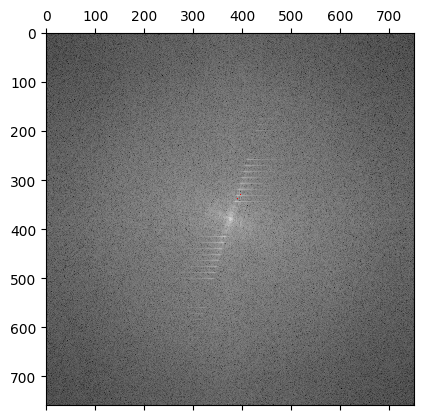

In [45]:
FFT = np.fft.fftshift(np.fft.fft2(img_gato))
FFT[330,390] = np.nan
FFT[331,391] = np.nan
FFT[332,392] = np.nan
FFT[333,393] = np.nan
FFT[334,394] = np.nan
FFT[335,395] = np.nan
FFT[336,396] = np.nan
FFT[337,390] = np.nan
FFT[338,391] = np.nan
FFT[320,392] = np.nan
FFT[321,393] = np.nan
FFT[322,394] = np.nan
FFT[323,395] = np.nan
FFT[324,396] = np.nan
FFT[325,393] = np.nan
FFT[326,394] = np.nan
FFT[327,395] = np.nan
FFT[328,396] = np.nan
FFT[329,396] = np.nan
plt.matshow(abs(FFT),cmap=cmap,norm="log")
FFT = np.fft.ifftshift(FFT)

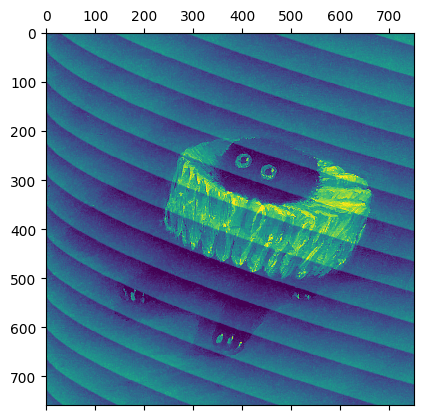

In [38]:
FFT = np.fft.fft2(img_gato)
FFT = np.fft.fftshift(FFT)
# FFT[23,21] = 0
# FFT[27,29] = 0
FFT = np.fft.ifftshift(FFT)
plt.matshow( np.fft.ifft2(FFT).real )

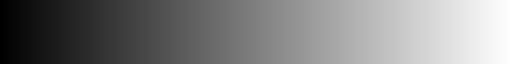